#### Load libraries

In [1]:
from SALib.analyze import sobol ##sobol is a type of SA analysis implemented in SALib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Define Sobol Problem

In [38]:
default_values = {'uptake_rate_cancer': 1.0, 'speed_cancer': 1.0, 'transformation_rate_cancer': 5e-5,
                  'speed_monocytes':1.0, 'dead_phagocytosis_rate_monocytes':25e-2, 'speed_macrophages':1.0,
                  'dead_phagocytosis_rate_macrophages':92e-2, 'secretion_rate_NLCs':1.0, 'speed_NLCs':1.0,
                  'dead_phagocytosis_rate_NLCs':4e-2}
## number of inputs = 10

#Define the problem for SALib
problem = {
    'num_vars': len(default_values),
    'names': list(default_values.keys()),
    'bounds': np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [2.0, 2.0, 10e-5, 2.0, 50e-2, 2.0, 184e-2, 2.0, 2.0, 8e-2]]).T # 100% percent of variation from default values 
}

#Number of samples N(D+2) where N:nsamples and D:ninputs. For sobol analysis N needs to be a power of 2, if not it will give error

#### Load output from simulations (viability and concentration)

In [117]:
#Read output of simulation
viability = pd.read_csv('../data_output/viability.csv', delimiter=",", skiprows=[15, 16], usecols=range(1, 705))
concentration = pd.read_csv('../data_output/concentration.csv', delimiter=",", skiprows=[15, 16], usecols=range(1, 705))

#### Run sobol analysis

#### Cell viability

In [118]:
#Sobol analysis is run by each time point and results are gathered in a matrix 
Si_S1 = []
Si_S1conf = []
Si_ST = []
Si_STconf = []
for i in range(1, 14):
    Si = sobol.analyze(problem, viability.iloc[i].values, print_to_console=False, calc_second_order=True)
    Si_S1.append(Si['S1'])
    Si_S1conf.append(Si['S1_conf'])
    Si_ST.append(Si['ST'])
    Si_STconf.append(Si['ST_conf']) 

In [119]:
Si_S1 = pd.DataFrame(Si_S1, columns=default_values.keys())
Si_S1conf = pd.DataFrame(Si_S1conf, columns=default_values.keys())
Si_ST = pd.DataFrame(Si_ST, columns=default_values.keys())
Si_STconf = pd.DataFrame(Si_STconf, columns=default_values.keys())

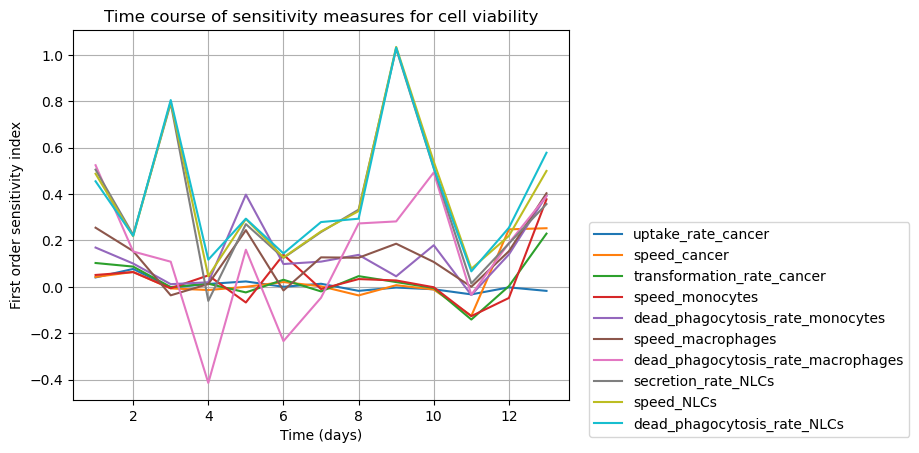

In [120]:
# Extract time points
time_points = np.arange(1, 14)  # Assuming time points are 1 to 13

#### Sensitivity index First order
for param_index in range(Si_S1.shape[1]):
    plt.plot(time_points, Si_S1.iloc[:, param_index], label=Si_S1.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('First order sensitivity index')
plt.title('Time course of sensitivity measures for cell viability')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()


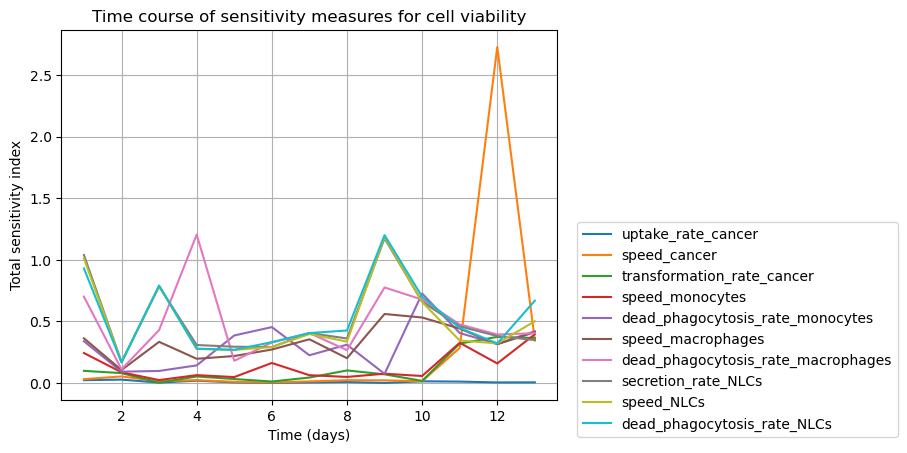

In [121]:
#### Sensitivity index Total
for param_index in range(Si_ST.shape[1]):
    plt.plot(time_points, Si_ST.iloc[:, param_index], label=Si_ST.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('Total sensitivity index')
plt.title('Time course of sensitivity measures for cell viability')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()

#### Cell concentration

In [122]:
#Sobol analysis is run by each time point and results are gathered in a matrix 
Si_S1 = []
Si_S1conf = []
Si_ST = []
Si_STconf = []
for i in range(1, 14):
    Si = sobol.analyze(problem, concentration.iloc[i].values, print_to_console=False, calc_second_order=True)
    Si_S1.append(Si['S1'])
    Si_S1conf.append(Si['S1_conf'])
    Si_ST.append(Si['ST'])
    Si_STconf.append(Si['ST_conf']) 

In [123]:
Si_S1 = pd.DataFrame(Si_S1, columns=default_values.keys())
Si_S1conf = pd.DataFrame(Si_S1conf, columns=default_values.keys())
Si_ST = pd.DataFrame(Si_ST, columns=default_values.keys())
Si_STconf = pd.DataFrame(Si_STconf, columns=default_values.keys())

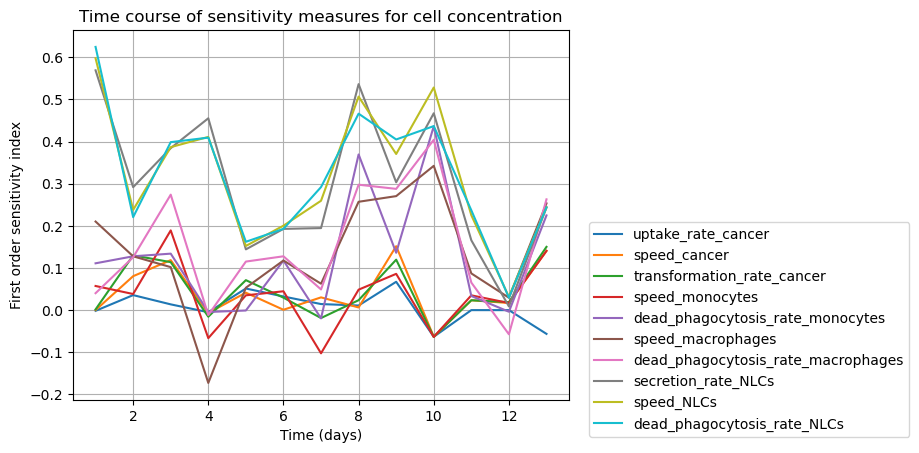

In [124]:
# Extract time points
time_points = np.arange(1, 14)  # Assuming time points are 1 to 13

#### Sensitivity index First order
for param_index in range(Si_S1.shape[1]):
    plt.plot(time_points, Si_S1.iloc[:, param_index], label=Si_S1.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('First order sensitivity index')
plt.title('Time course of sensitivity measures for cell concentration')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()

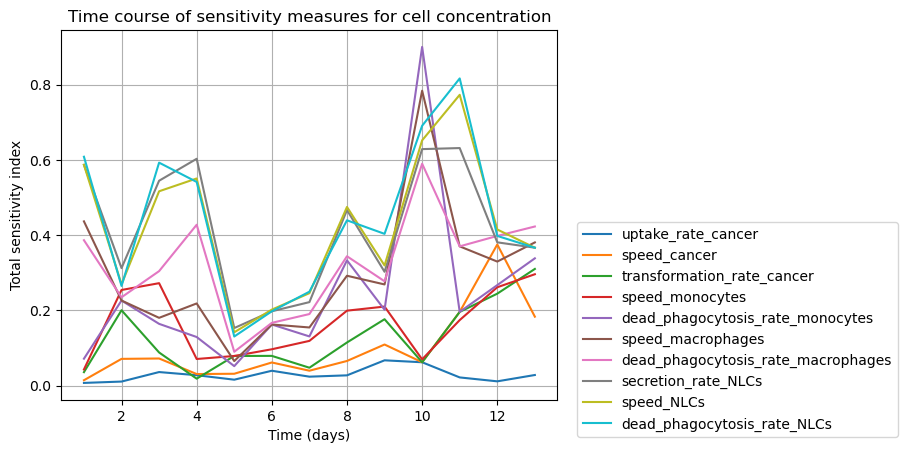

In [125]:
#### Sensitivity index Total
for param_index in range(Si_ST.shape[1]):
    plt.plot(time_points, Si_ST.iloc[:, param_index], label=Si_ST.columns[param_index])

plt.xlabel('Time (days)')
plt.ylabel('Total sensitivity index')
plt.title('Time course of sensitivity measures for cell concentration')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 0.5))

plt.grid(True)
plt.show()